<h6 style='text-align:center;font-size:40px;background-color:CRIMSON;border:20px;color:white'>HOUSE PRICE DATA PREDICTION<h6>

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>CONTENTS<h2>

1. Import Relevant Libraries
2. Data Inspection
3. Data Cleaning
4. Exploratory Data Analysis

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:50px;color:white'>PROBLEM STATEMENT<h2>

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>DATA<h2>

About this file
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 1: Importing the Relevant Libraries <h2>

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv(r"C:\Users\Pelux\Desktop\New folder (15)\Data\housing.csv")

In [5]:
df.head(20)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
2     -122.24     37.85                52.0       1467.0           190.0   
3     -122.25     37.85                52.0       1274.0           235.0   
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
6     -122.25     37.84                52.0       2535.0           489.0   
7     -122.25     37.84                52.0       3104.0           687.0   
8     -122.26     37.84                42.0       2555.0           665.0   
9     -122.25     37.84                52.0       3549.0           707.0   
10    -122.26     37.85                52.0       2202.0           434.0   
11    -122.26     37.85                52.0       3503.0           752.0   
12    -122.26     37.85                52.0       2491.0           474.0   
13    -122.26     37.84                52.0        696.0           191.0   
14    -122.26     37.85                52.0       2643.0           626.0   
15    -122.26     37.85                50.0       1120.0           283.0   
16    -122.27     37.85                52.0       1966.0           347.0   
17    -122.27     37.85                52.0       1228.0           293.0   
18    -122.26     37.84                50.0       2239.0           455.0   
19    -122.27     37.84                52.0       1503.0           298.0   

    population  households  median_income  median_house_value ocean_proximity  
0        322.0       126.0         8.3252            452600.0        NEAR BAY  
1       2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2        496.0       177.0         7.2574            352100.0        NEAR BAY  
3        558.0       219.0         5.6431            341300.0        NEAR BAY  
4        565.0       259.0         3.8462            342200.0        NEAR BAY  
5        413.0       193.0         4.0368            269700.0        NEAR BAY  
6       1094.0       514.0         3.6591            299200.0        NEAR BAY  
7       1157.0       647.0         3.1200            241400.0        NEAR BAY  
8       1206.0       595.0         2.0804            226700.0        NEAR BAY  
9       1551.0       714.0         3.6912            261100.0        NEAR BAY  
10       910.0       402.0         3.2031            281500.0        NEAR BAY  
11      1504.0       734.0         3.2705            241800.0        NEAR BAY  
12      1098.0       468.0         3.0750            213500.0        NEAR BAY  
13       345.0       174.0         2.6736            191300.0        NEAR BAY  
14      1212.0       620.0         1.9167            159200.0        NEAR BAY  
15       697.0       264.0         2.1250            140000.0        NEAR BAY  
16       793.0       331.0         2.7750            152500.0        NEAR BAY  
17       648.0       303.0         2.1202            155500.0        NEAR BAY  
18       990.0       419.0         1.9911            158700.0        NEAR BAY  
19       690.0       275.0         2.6033            162900.0        NEAR BAY

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 2. Data Inspection<h2>

In [6]:
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.apply(lambda x: sum(x.isnull()))

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Check unique values in dataset

In [9]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

## Check for categorical attributes

In [10]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [11]:
categorical = df.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 1
Numerical Features in Train Set: 9


In [12]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 3. Data Cleaning <h2>

### Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [13]:
df = df.join(pd.get_dummies(df.ocean_proximity)).drop('ocean_proximity', axis=1)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  <1H OCEAN  \
0       322.0       126.0         8.3252            452600.0          0   
1      2401.0      1138.0         8.3014            358500.0          0   
2       496.0       177.0         7.2574            352100.0          0   
3       558.0       219.0         5.6431            341300.0          0   
4       565.0       259.0         3.8462            342200.0          0   

   INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0       0       0         1           0  
1       0       0         1           0  
2       0       0         1           0  
3       0       0         1           0  
4       0       0         1           0

In [14]:
df=df.dropna()
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value     <1H OCEAN        INLAND        ISLAND  \
count        20433.000000  20433.000000  20433.000000  20433.000000   
mean        206864.413155      0.442128      0.317917      0.000245   
std         115435.667099      0.496652      0.465678      0.015641   
min          14999.000000      0.000000      0.000000      0.000000   
25%         119500.000000      0.000000      0.000000      0.000000   
50%         179700.000000      0.000000      0.000000      0.000000   
75%         264700.000000      1.000000      1.000000      0.000000   
max         500001.000000      1.000000      1.000000      1.000000   

           NEAR BAY    NEAR OCEAN  
count  20433.000000  20433.000000  
mean       0.111095      0.128615  
std        0.314257      0.334782  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 4. Exploratory Data Analysis <h2>

In [15]:
import dtale

In [16]:
dtale.show(df)

In [17]:
import sys

!"{sys.executable}" -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [18]:
from pandas_profiling import ProfileReport

2023-02-15 08:48:53,653 - INFO     - Pandas backend loaded 1.3.4
2023-02-15 08:48:53,774 - INFO     - Numpy backend loaded 1.20.3
2023-02-15 08:48:53,777 - INFO     - Pyspark backend NOT loaded
2023-02-15 08:48:53,779 - INFO     - Python backend loaded


In [19]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [20]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

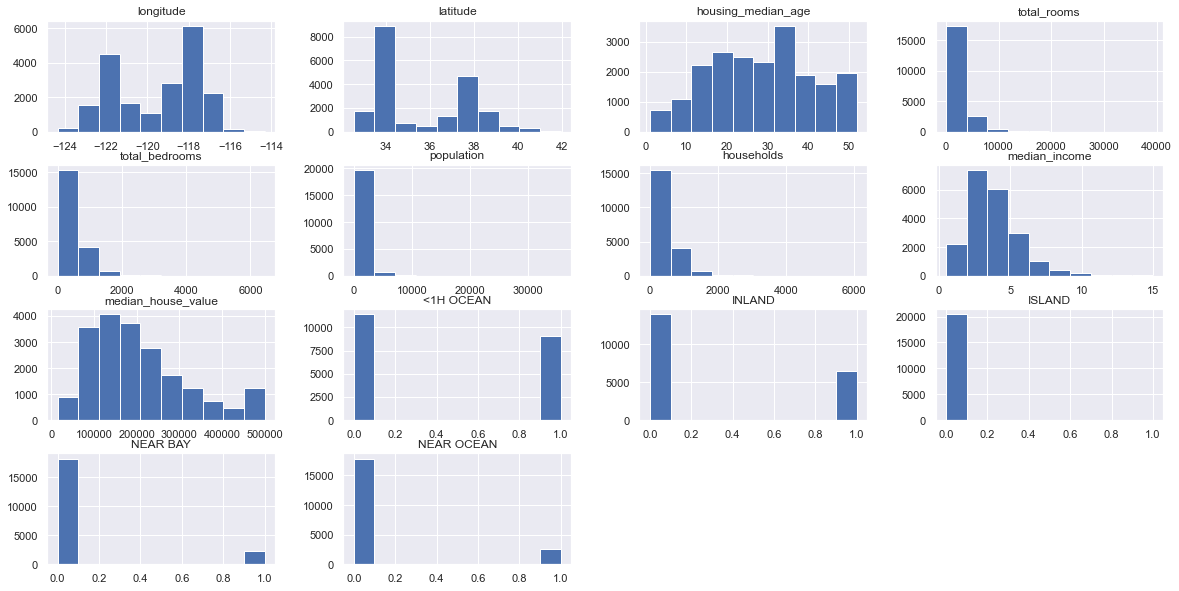

In [21]:
df.hist(figsize=(20,10))
plt.show()

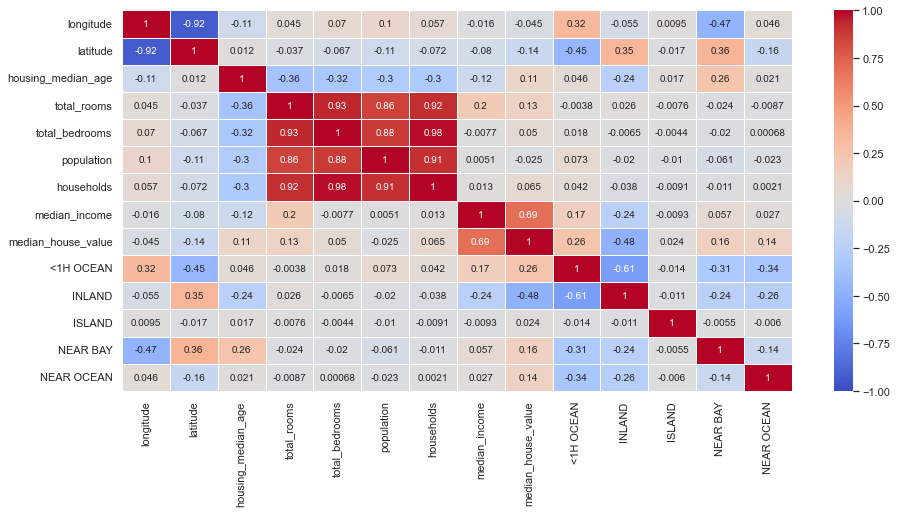

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

In [23]:
def compute_correlations_price_ratio(dataset):
  correlations = dataset.corr()
  res = correlations["median_house_value"].abs().sort_values(ascending=False)
  print(res)
compute_correlations_price_ratio(df)

median_house_value    1.000000
median_income         0.688355
INLAND                0.484787
<1H OCEAN             0.257614
NEAR BAY              0.160526
latitude              0.144638
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
longitude             0.045398
population            0.025300
ISLAND                0.023525
Name: median_house_value, dtype: float64


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 5. Feature Engineering<h2>

In [24]:
df["bedroom_per_room"]=df["total_bedrooms"]/df["total_rooms"]
df["rooms_per_household"]=df["total_rooms"]/df["households"]

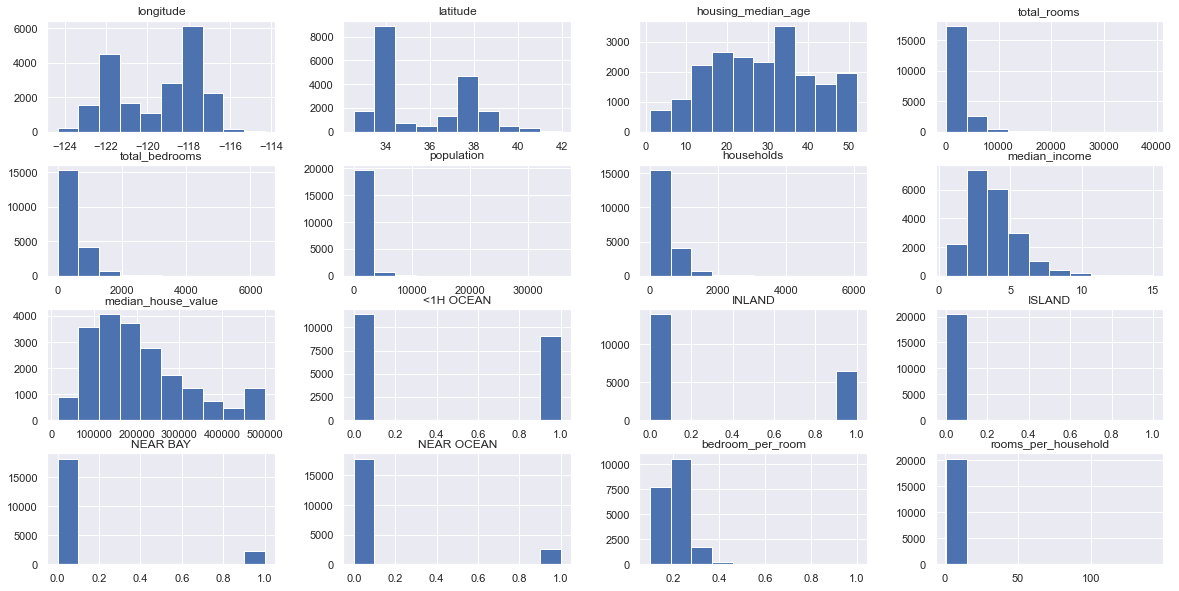

In [25]:
df.hist(figsize=(20,10))
plt.show()

### Log transformation

In [26]:
columns_list = ['total_rooms','total_bedrooms','population','households',"bedroom_per_room","rooms_per_household"]
for column in columns_list:
    df[column]=np.log(df[column]+1)

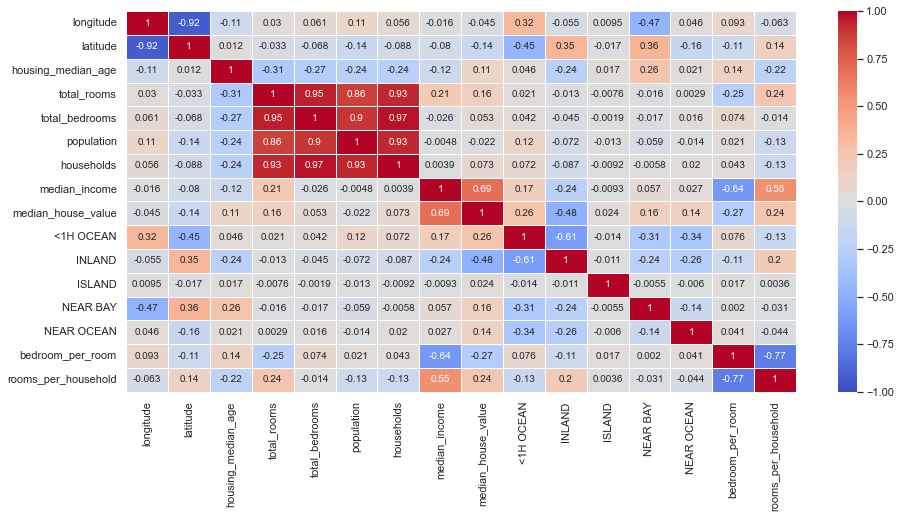

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

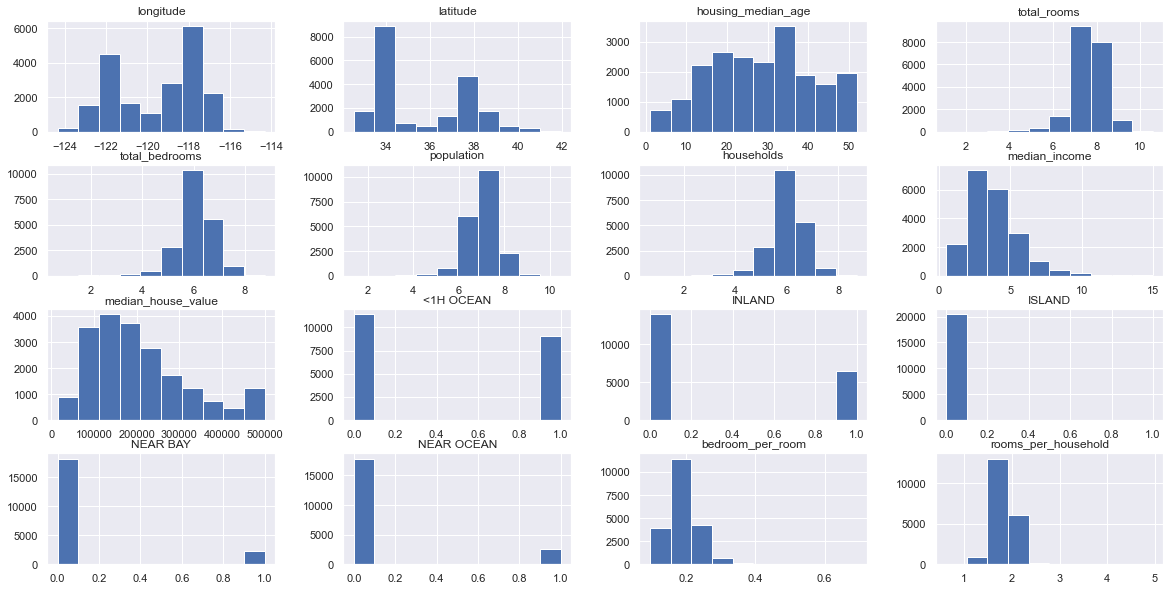

In [28]:
df.hist(figsize=(20,10))
plt.show()

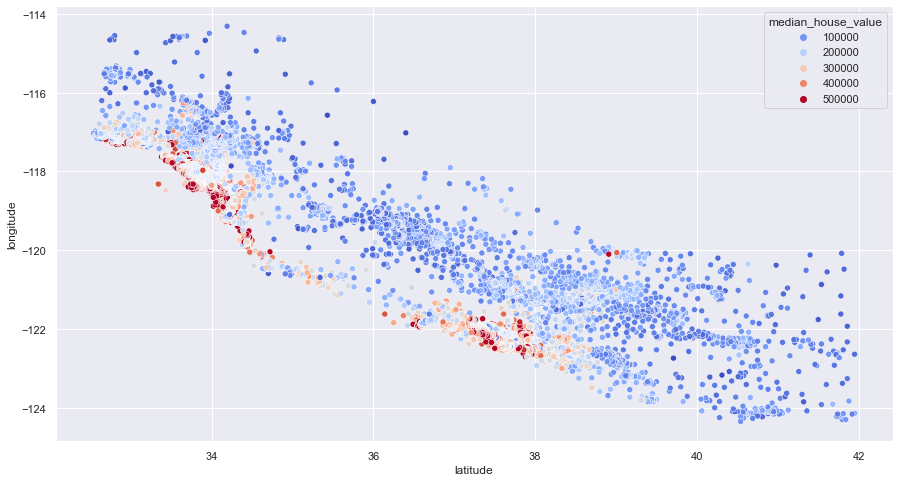

In [29]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=df, hue="median_house_value", palette="coolwarm")
plt.show()

## Splitting and standardising

In [30]:
X = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)

In [32]:
from sklearn.preprocessing import StandardScaler
# Crating a standard scaler object
scaler=StandardScaler()
# using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
# here using transform only to avoid data leakage
X_test=scaler.transform(X_test)

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 6. Building Model<h2>

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [34]:
reg.score(X_test,y_test)

0.6645681366685723

In [35]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R2: ',r2)
print('RMSE: ', rmse)
linear_regression = ('Linear_regression', r2, rmse)

R2:  0.6645681366685723
RMSE:  67261.03896977758


## Decision Trees

Tree based algorithms doesn't really need scaling, regardless the scaled data will be fiited.

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree = tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.6508649075207955

In [37]:
y_pred=tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R2: ',r2)
print('RMSE: ', rmse)  
decision_tree = ('Decision tree', r2, rmse)

R2:  0.6508649075207955
RMSE:  68621.17744585265


## K-Nearest Neighbors Regressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
knn = KNeighborsRegressor()
knn = tree.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6428987403440369

In [40]:
y_pred=tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R2: ',r2)
print('RMSE: ', rmse)
knn_reg = ('KNN regressor', r2, rmse)

R2:  0.6428987403440369
RMSE:  69399.62203769377


## Random forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=33)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8184692346021512

In [42]:
y_pred=forest.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R2: ',r2)
print('RMSE: ', rmse) 

R2:  0.8184692346021512
RMSE:  49480.77959501561


## Hyperparmeter tuning


As Random Forest Regressor returns significantly higher score than the other models tried, we can try to adjust the hyperparameters here. In cross validation, we take the data and split it into k folds with K being a number. if we split into k = 5, we use all but 1 for training, and 1 for evuluation. and this is repeated for all possible combinations

In [43]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.795 using {'n_estimators': 1000}
0.771 (0.004) with: {'n_estimators': 10}
0.793 (0.002) with: {'n_estimators': 100}
0.795 (0.000) with: {'n_estimators': 1000}


In [44]:
grid_search_forest.best_estimator_ 

RandomForestRegressor(n_estimators=1000)

In [45]:
grid_search_forest.best_estimator_ .score(X_test, y_test)

0.8216293422554215

In [46]:
pred = grid_search_forest.best_estimator_.predict(X_test)

r2 = r2_score(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('R2: ', r2)
print('RMSE: ', rmse)
random_forest = ('Random Forest', r2, rmse)

R2:  0.8216293422554215
RMSE:  49048.20531113993


The scores did imporved but not by any significant amount. More tuning can be done, but due to high computational time I've decided to stick with these results

## Feature importance

In [48]:
rand = grid_search_forest.best_estimator_ 
feature_importance=pd.DataFrame(data=rand.feature_importances_,
             index=X.columns,
             columns=["importance"])

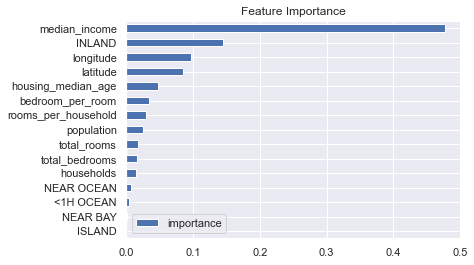

In [49]:
feature_importance.sort_values("importance").plot(kind='barh',title='Feature Importance')
plt.show()

## Gradient Boosting Regressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
gbr = GradientBoostingRegressor(random_state=33)
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

0.7704787649010588

In [73]:
y_pred=gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R2: ',r2)
print('RMSE: ', rmse) 
gbr_reg = ('GradientBoostingRegressor', r2, rmse)

R2:  0.7704787649010588
RMSE:  55638.17168378584


In [74]:
df_results = pd.DataFrame([linear_regression, knn_reg, decision_tree, random_forest, gbr_reg], columns=['model','R2','RMSE'])
df_results.sort_values('R2',ascending=False, ignore_index=True)

model        R2          RMSE
0              Random Forest  0.821629  49048.205311
1  GradientBoostingRegressor  0.770479  55638.171684
2          Linear_regression  0.664568  67261.038970
3              Decision tree  0.650865  68621.177446
4              KNN regressor  0.642899  69399.622038